Импортирую библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt 


Подгружаю датасет, смотрю на данные, пустые значения.

In [2]:
df = pd.read_csv('experiment_lesson_4.csv')

In [3]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [7]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

#### Формулирую гипотезы для проверки:
- Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет.
- Альтернативная гипотеза (H1): Разницы между средним временем доставки в тестовой и контрольной нет.

### Задача 1: Постройте распределение времени доставки по районам отдельно в контрольной и тестовой группах

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

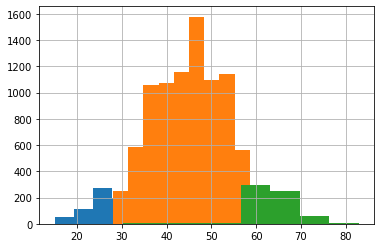

In [11]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

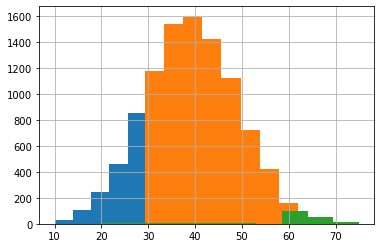

In [10]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

### Задача 2: Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [22]:
cnt = df.groupby('experiment_group').order_id.count()
print(cnt)
print(cnt[1] - cnt[0])

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64
12


##### Ответ: на 12 наблюдений

### Задача 3: Проверьте выполнение условий на нормальность и посчитайте стандартное отклонение в тесте и в контроле.

Нормальность распределения проверяю с помощью теста Shapiro-Wilk. Этот тест показывает, что значения в группах распределены нормально (Н0). Перед применением теста делаю семплирование с помощью sample(), в качестве аргумента random_state = 17, который позволяет сделать результаты более стабильными.

In [43]:
#  Shapiro-Wilk для тестовой группы

stats.shapiro(df.query('experiment_group == "test"').delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

* Тест показал, что значения в тестовой группе распределены нормально (pvalue=0.14013493061065674)

In [45]:
# Shapiro-Wilk для контрольной группы

stats.shapiro(df.query('experiment_group == "control"').delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

* Значения в контрольной группе также распределены нормально (pvalue = 0.12411931157112122)

In [39]:
round((df.query('experiment_group == "test"').delivery_time.std()),2)

9.88

In [41]:
round((df.query('experiment_group == "control"').delivery_time.std()),2)

9.99

* Стандартное отклонение в тесте - 9.88, в контроле - 9.99

### Задача 4: Проведите сравнение средних в тесте и контроле (t - test)

Для сравнения средних в экспериментальных группах использую Student's t-test 
* scipy.stats.ttest_ind(a,b)

In [59]:
stats.ttest_ind((df.query('experiment_group == "test"').delivery_time), (df.query('experiment_group == "control"').delivery_time))

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

* Статистика в тесте равно -43, p-value <= 0.05, следовательно можно говорить о том, что наши группы значимо различаются между собой

### Задача 5: На сколько процентов изменилось среднее время доставки в тестовой группе? 

In [63]:
# Рассчитываю среднее для тестовой группы

test_m=df.query('experiment_group == "test"').delivery_time.mean()

In [65]:
# Рассчитываю среднее для контрольной группы

control_m=df.query('experiment_group == "control"').delivery_time.mean()

In [69]:
# Рассчитываю насколько % изменилось среднее время доставки в тестовой группе относительно контрольной, округляю до сотых

round(((test_m - control_m)/control_m *100),2)

-13.35

* Таким образом, время доставки в тестовой группе снизилось на 13%

### 6. Выводы A/B теста

Раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.